# <font color='orange'>NYC Taxi Data Exploratory Data Analysis</font>
This dataset is a record of taxi trips in New York City.

**Data dictionary**</br>
Here is the description of all the variables / features available in the dataset which will help you to perform EDA:
- VendorID - A code indicating the TPEP provider that provided the record. 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
- tpep_pickup_datetime - The date and time when the meter was engaged.
- tpep_dropoff_datetime - The date and time when the meter was disengaged.
- Passenger_count - The number of passengers in the vehicle. This is a driver-entered value.
- Trip_distance - The elapsed trip distance in miles reported by the taximeter.
- PULocationID - TLC Taxi Zone in which the taximeter was engaged
- DOLocationID - TLC Taxi Zone in which the taximeter was disengaged
- RateCodeID - The final rate code in effect at the end of the trip. 1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride
- Store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. Y= store and forward trip, N= not a store and forward trip
- Payment_type - A numeric code signifying how the passenger paid for the trip. 1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip
- Fare_amount - The time-and-distance fare calculated by the meter.
- Extra - Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
- MTA_tax - $0.50 MTA tax that is automatically triggered based on the metered rate in use.
- Improvement_surcharge - $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
- Tip_amount - This field is automatically populated for credit card tips. Cash tips are not included.
- Tolls_amount - Total amount of all tolls paid in trip.
- Total_amount - The total amount charged to passengers. Does not include cash tips.
- Congestion_Surcharge - Total amount collected in trip for NYS congestion surcharge.
- Airport_fee - $1.25 for pick up only at LaGuardia and John F. Kennedy Airports

Our objective is to create a model that will accurately estimate the fare amount of trips. Accuracy is measured by root mean square error.

We will also be performing exploratory data analysis in an attempt to better understand the dataset using pandas-dataprofiling.

#  Import necessary Packages

In [ ]:
import pandas as pd
import numpy as np
import os
import zipfile
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [110]:
zf = zipfile.ZipFile('NYC_taxi_fare_data.zip') 
df = pd.read_csv(zf.open('df_all.csv'))

# Understanding Data

In [43]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [44]:
df.shape

(2463931, 20)

In [111]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 357.2+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,2463931.0,1.707819,0.502137,1.00,1.00,2.00,2.00,6.00
passenger_count,2392428.0,1.389453,0.982969,0.00,1.00,1.00,1.00,9.00
trip_distance,2463931.0,5.372751,547.871404,0.00,1.04,1.74,3.13,306159.28
RatecodeID,2392428.0,1.415507,5.917573,1.00,1.00,1.00,1.00,99.00
PULocationID,2463931.0,166.076809,65.468057,1.00,132.00,162.00,234.00,265.00
DOLocationID,2463931.0,163.580716,70.790159,1.00,113.00,162.00,236.00,265.00
payment_type,2463931.0,1.194449,0.500178,0.00,1.00,1.00,1.00,5.00
fare_amount,2463931.0,12.946484,255.814887,-480.00,6.50,9.00,14.00,401092.32
extra,2463931.0,1.006710,1.236226,-4.50,0.00,0.50,2.50,33.50
mta_tax,2463931.0,0.491454,0.082916,-0.50,0.50,0.50,0.50,16.59


# check duplicates

In [18]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace = True)
print(len(df))

False    2463931
dtype: int64
2463931


- There are no duplicated rows in this dataset.

# Checking missing value

In [19]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71503
trip_distance                0
RatecodeID               71503
store_and_fwd_flag       71503
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71503
airport_fee              71503
dtype: int64

We see that passenger_count, ratecodeID, store_and_fwd_flag, congestion_surcharge and airport_fee have exactly same number of missing values. 

In [24]:
df[df.isna().any(axis=1)][["passenger_count", "RatecodeID", "store_and_fwd_flag", "congestion_surcharge", "airport_fee"]]

,passenger_count,RatecodeID,store_and_fwd_flag,congestion_surcharge,airport_fee
2392428,NaN,NaN,NaN,NaN,NaN
2392429,NaN,NaN,NaN,NaN,NaN
2392430,NaN,NaN,NaN,NaN,NaN
2392431,NaN,NaN,NaN,NaN,NaN
2392432,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2463926,NaN,NaN,NaN,NaN,NaN
2463927,NaN,NaN,NaN,NaN,NaN
2463928,NaN,NaN,NaN,NaN,NaN
2463929,NaN,NaN,NaN,NaN,NaN


- Our assumption is correct all rows have missing values so we'll drop them

In [112]:
df.dropna(inplace=True)

In [26]:
# Check again for missing values
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

# Pandas profiling 

It is an open source Python module, which can quickly do an exploratory data analysis with just a few lines of code. Besides, if this is not enough to convince us to use this tool, it also generates interactive reports in web format that can be presented to any person, even if they don’t know programming.

In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available.

In [27]:
profile = pandas_profiling.ProfileReport(df, title="Profile Report", minimal=True, progress_bar=False)
profile.to_notebook_iframe()

- fare_amount contains some negative values, we will remove these rows and set a plausible upper limit.
- passenger_count contains some trips with zero passengers, we will remove these rows.

In [113]:
df=df[(df["passenger_count"]>=1) & (df["passenger_count"]<7)]
df=df[(df["fare_amount"]>0) &(df["fare_amount"]<50000)]

Let's Crete some advance Plot to understand more about the data
- Passenger count have any effect on fare

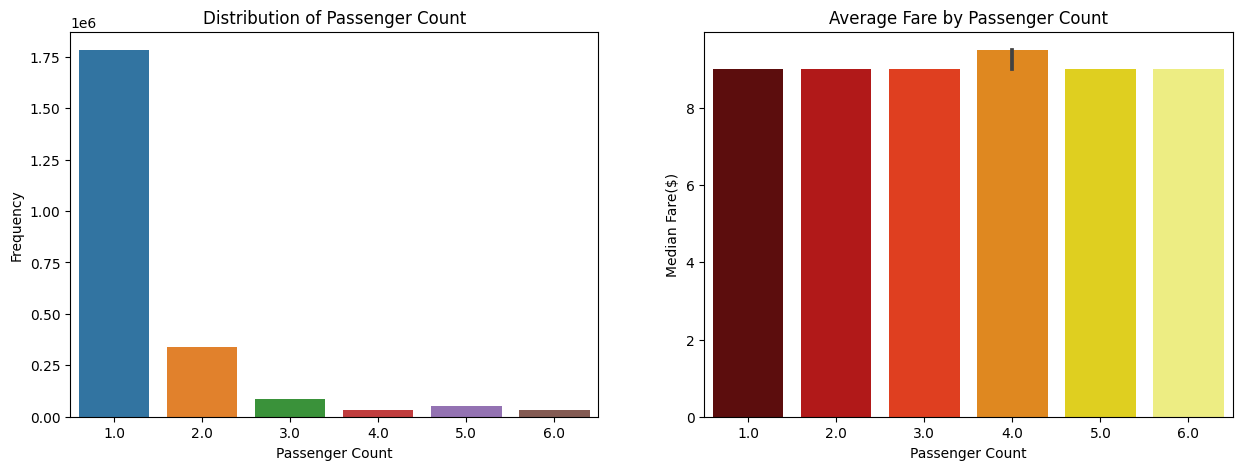

In [60]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(df.passenger_count, ax=ax[0])
ax[0].set_xlabel('Passenger Count')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of Passenger Count')
sns.barplot(data=df,x="passenger_count",y="fare_amount",estimator=median,palette='hot')
ax[1].set_xlabel('Passenger Count')
ax[1].set_ylabel('Median Fare($)')
ax[1].set_title('Average Fare by Passenger Count')
fig.show()

- Most taxi rides only have 1 passenger, but passenger count doesn't show any relationship to the fare amount.

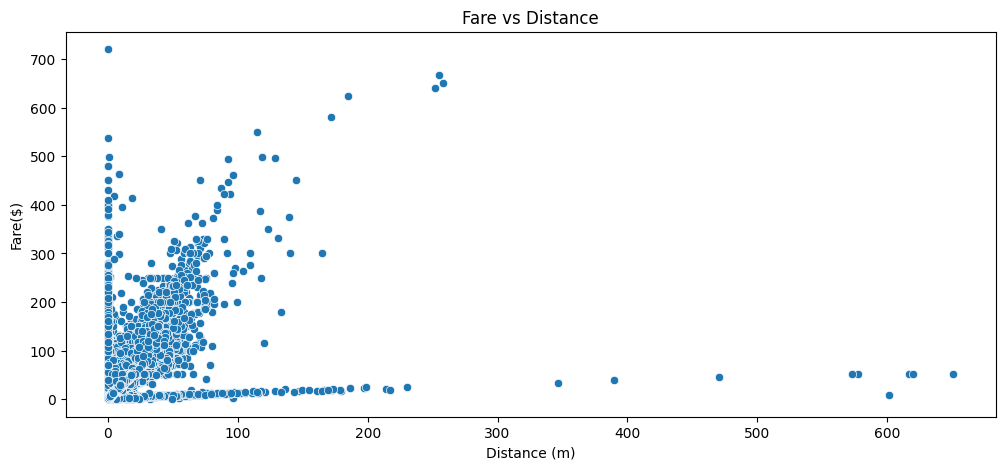

In [79]:
fig = plt.figure(figsize=(12, 5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df).set_title('Fare vs Distance')
plt.xlabel('Distance (m)')
plt.ylabel('Fare($)')
plt.show()

- We see an expected relationship, with fares increasing as distance increases. There are, however, a large number of data points that seem to hug each axis.
- Many taxi rides with close to 0 distance between the pickup and dropoff locations have much higher fares than we would expect, with the fare distribution of very low distance trips seeming similar to the distribution of all other trips. Could this have some unknown but real cause, or is it erroneous data?

In [114]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

df["year"]=df.tpep_pickup_datetime.dt.year
df["weekday"]=df.tpep_pickup_datetime.dt.dayofweek
df["time"]=(df.tpep_pickup_datetime.dt.hour)

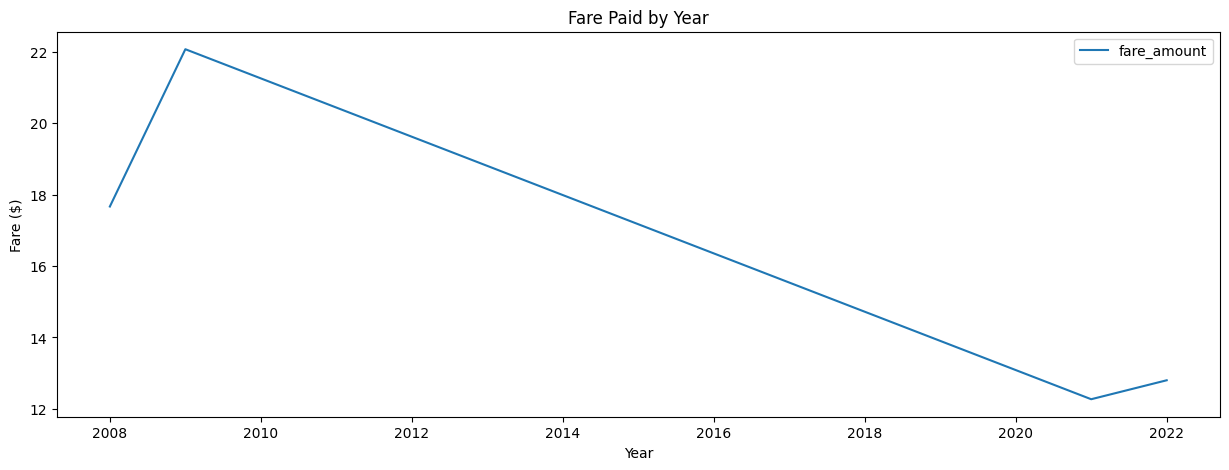

In [95]:
df.pivot_table('fare_amount', index='year').plot(figsize=(15,5))
plt.title('Fare Paid by Year')
plt.ylabel('Fare ($)')
plt.xlabel('Year')
plt.show()

In [115]:
df=df[df["year"]>2020]

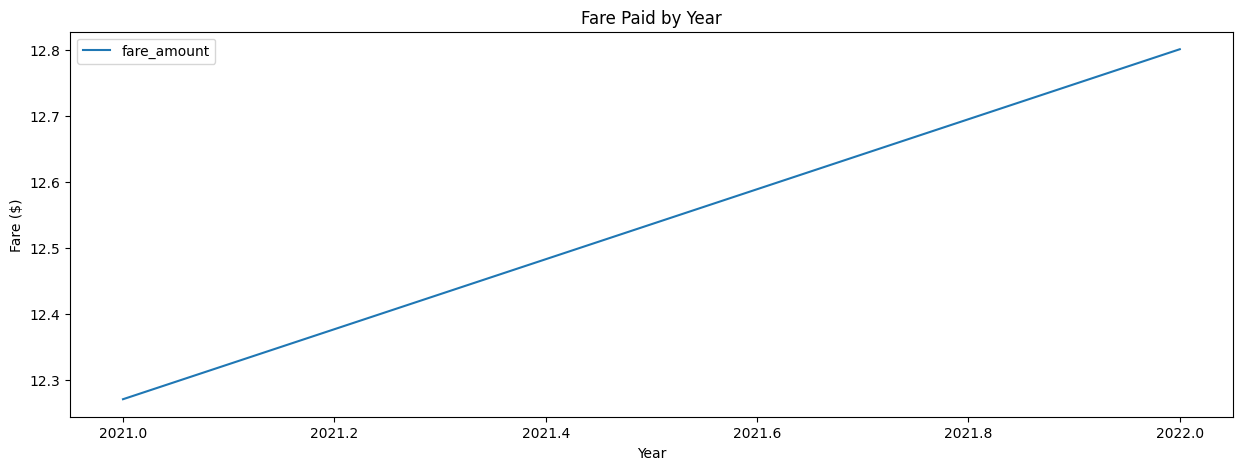

In [102]:
df.pivot_table('fare_amount', index='year').plot(figsize=(15,5))
plt.title('Fare Paid by Year')
plt.ylabel('Fare ($)')
plt.xlabel('Year')
plt.show()

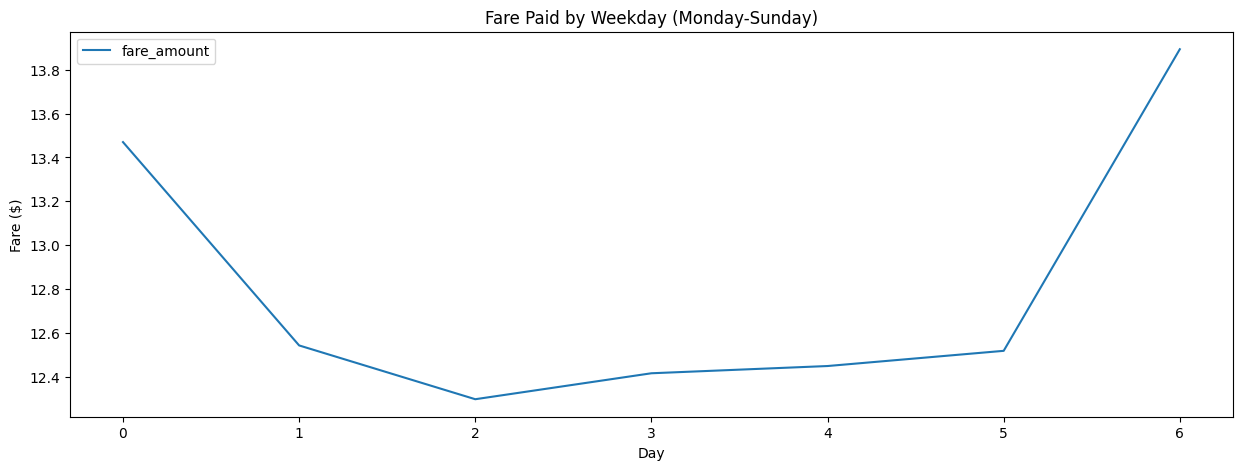

In [103]:
df.pivot_table('fare_amount', index='weekday').plot(figsize=(15,5))
plt.title('Fare Paid by Weekday (Monday-Sunday)')
plt.ylabel('Fare ($)')
plt.xlabel('Day')
plt.show()

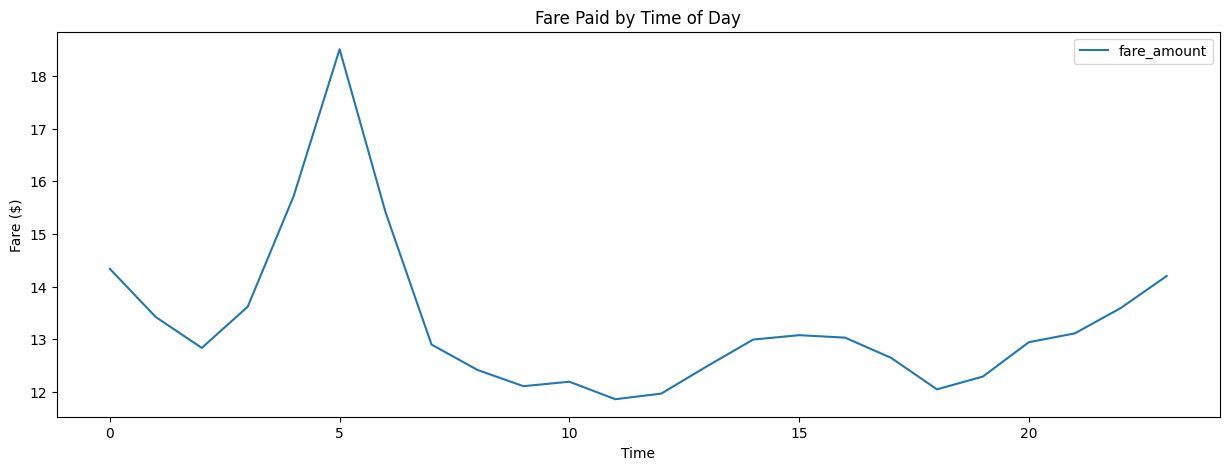

In [104]:
df.pivot_table('fare_amount', index='time').plot(figsize=(15,5))
plt.ylabel('Fare ($)')
plt.xlabel('Time')
plt.title('Fare Paid by Time of Day')
plt.show()

If we assumed that all trips with a pickup to dropoff point distance of less than 50m have had location data entered incorrectly, then we would expect fares for this group to come from the same distribution as properly recorded trips. A confounding factor we should look out for is the potential for some true very short trips to coexist with misrecorded data.

We will explore the distributions of these two subsets by using a Q-Q plot

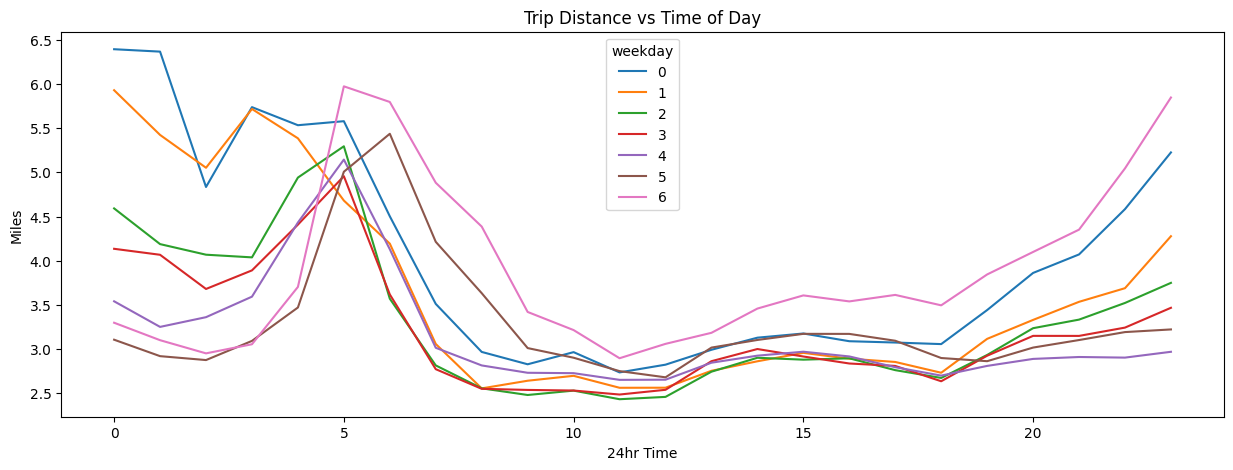

In [107]:
df.pivot_table('trip_distance', index='time', columns='weekday').plot(figsize=(15,5))
plt.ylabel('Miles')
plt.xlabel('24hr Time')
plt.title('Trip Distance vs Time of Day')
plt.show()

In [123]:
df["store_and_fwd_flag"]=df["store_and_fwd_flag"].map({"Y":0,"N":1})

In [124]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,year,weekday,time
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,1,142,236,1,...,0.5,3.65,0.0,0.3,21.95,2.5,0.0,2022,5,0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,1,236,42,1,...,0.5,4.00,0.0,0.3,13.30,0.0,0.0,2022,5,0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,1,166,166,1,...,0.5,1.76,0.0,0.3,10.56,0.0,0.0,2022,5,0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,1,114,68,2,...,0.5,0.00,0.0,0.3,11.80,2.5,0.0,2022,5,0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,1,68,163,1,...,0.5,3.00,0.0,0.3,30.30,2.5,0.0,2022,5,0


# Separate dependent and independent variables

In [137]:
y = df['fare_amount'].values

X = df.drop(columns = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime','fare_amount','extra',
       'mta_tax', 'tip_amount', 'tolls_amount','total_amount','year'])

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [138]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [139]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1628581, 12)
(1628581,)
(697964, 12)
(697964,)


# Import necessary libraries for accuracy of models

In [140]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [141]:
from sklearn.linear_model import LinearRegression

logreg = LinearRegression()
logreg.fit(X_train, y_train)
print(logreg)

prediction=logreg.predict(X_test)

# model accuracy with the same data only which is used to train the model
print('Model Accuracy: ','{:.2f}%'.format(100*logreg.score(X_test, y_test)))
print('R square value: ','{:.2f}%'.format(100*r2_score(y_test,prediction)))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,prediction))
print('Root Mean Squared Error Accuracy: ',np.sqrt(mean_squared_error(y_test,prediction)))

LinearRegression()
Model Accuracy:  77.25%
R square value:  77.25%
Mean Absolute Error Accuracy:  2.3012907475109348
Root Mean Squared Error Accuracy:  5.814999111427163


In [142]:
# basically it tells the slopes and intercept of the regression equation
# like 0.78*col1 + 2.17*col2 + 1.418*col3 + .........
print('The value of slope is: ',logreg.coef_)
print('The value of Intercept is: ',logreg.intercept_)

The value of slope is:  [ 7.82247612e-02  2.17325361e+00  1.41813923e-01  1.85990839e-02
  1.76894534e-04 -1.85810665e-04 -3.13545726e-01 -1.18537646e+02
 -1.59796702e+00  2.13953431e+00 -1.33644855e-02 -1.67614529e-02]
The value of Intercept is:  45.4202481288483


# Analyzing the errors and outliers in the predicted data

In [143]:
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=X.columns)

#Putting a column of fare_amount(original which was in our data) in the test data
TestingDataResults["fare_amount"]=y_test

#making prediction fare column and assigning the row wise value with the predicted data
TestingDataResults[('Predicted_fare_amount')]=np.round(prediction,4)
TestingDataResults[["fare_amount","Predicted_fare_amount"]].head()

,fare_amount,Predicted_fare_amount
417903,7.0,7.6421
279190,8.5,9.7193
585163,7.5,8.5701
921488,5.5,7.2842
939169,8.5,9.6330
